In [1]:
import spot, buddy
import pandas as pd
spot.setup()

Test the Mealy printer.

In [2]:
g = spot.ltl_to_game('G((a|c) <-> (b|d))', ["b", "d"])

In [3]:
spot.solve_game(g)

True

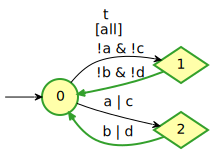

In [4]:
spot.highlight_strategy(g)

In [5]:
x = spot.solved_game_to_separated_mealy(g)

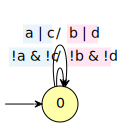

In [6]:
x

In [7]:
x.merge_edges()

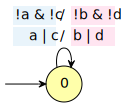

In [8]:
x

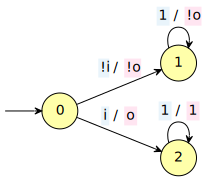

In [9]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o = buddy.bdd_ithvar(aut.register_ap("o"))
spot.set_synthesis_outputs(aut, o)
aut.new_states(3)
aut.new_edge(0,1,buddy.bdd_not(i)&buddy.bdd_not(o))
aut.new_edge(0,2,i&o)
aut.new_edge(1,1,buddy.bdd_not(o))
aut.new_edge(2,2,buddy.bddtrue)
aut

('o',)


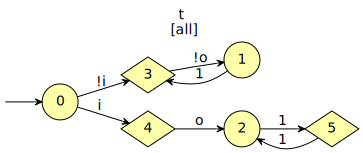

In [10]:
aut_s = spot.split_2step(aut)
print(spot.get_synthesis_output_aps(aut_s))
aut_s

task premin_time reorg_time partsol_time player_incomp_time incomp_time  \
0  presat     25643.3  1.112e-06    4.588e-06          9.888e-06   4.549e-06   
1     sat         NaN        NaN          NaN                NaN         NaN   

  split_all_let_time split_min_let_time split_cstr_time prob_init_build_time  \
0         1.5929e-05          9.338e-06       5.901e-06           6.7276e-05   
1                NaN                NaN             NaN                  NaN   

   ... refine_time   total_time n_classes n_refinement n_lit n_clauses  \
0  ...         NaN          NaN       NaN          NaN   NaN       NaN   
1  ...         NaN  0.000282709         2            0     7        12   

  n_iteration n_bisim_let n_min_states done  
0         NaN           2          NaN  NaN  
1           0         NaN            4    1  

[2 rows x 22 columns]

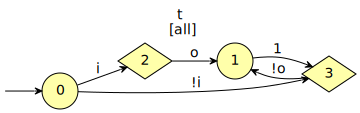

In [11]:
min_lvl = 0
aut_ms, table = spot.minimize_mealy(aut_s, min_lvl, display_log=True, return_log=True)
aut_ms

## A more involved example

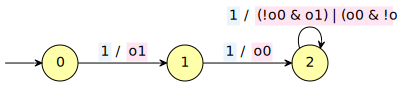

In [12]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o0 = buddy.bdd_ithvar(aut.register_ap("o0"))
no0 = buddy.bdd_not(o0)
o1 = buddy.bdd_ithvar(aut.register_ap("o1"))
no1 = buddy.bdd_not(o1)
spot.set_synthesis_outputs(aut, o0&o1)

vo1 = o0&o1
vo2 = no0&o1
vo3 = o0&no1

aut.new_states(3)

aut.new_edge(0,1,vo1|vo2)
aut.new_edge(1,2,vo1|vo3)
aut.new_edge(2,2,vo2|vo3)
aut

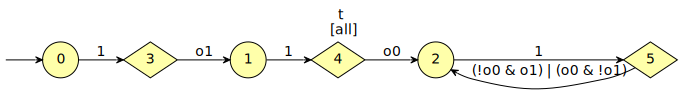

In [13]:
aut_s = spot.split_2step(aut)
aut_s

task premin_time reorg_time partsol_time player_incomp_time  \
0      presat     25643.4  1.683e-06    5.611e-06           2.66e-05   
1         sat         NaN        NaN          NaN                NaN   
2  refinement         NaN        NaN          NaN                NaN   
3         sat         NaN        NaN          NaN                NaN   

  incomp_time split_all_let_time split_min_let_time split_cstr_time  \
0     1.2e-07          3.647e-06          8.365e-06       3.747e-06   
1         NaN                NaN                NaN             NaN   
2         NaN                NaN                NaN             NaN   
3         NaN                NaN                NaN             NaN   

  prob_init_build_time  ... refine_time   total_time n_classes n_refinement  \
0           2.5538e-05  ...         NaN          NaN       NaN          NaN   
1                  NaN  ...         NaN          NaN         1            0   
2                  NaN  ...  4.4884e-05          NaN         1            1   
3                  NaN  ...         NaN  0.000200344         2            0   

  n_lit n_clauses n_iteration n_bisim_let n_min_states done  
0   NaN       NaN         NaN           1          NaN  NaN  
1     3         6           0         NaN          NaN  NaN  
2    10        16         NaN         NaN          NaN  NaN  
3    17        29           1         NaN            4    1  

[4 rows x 22 columns]

0    NaN
1      3
2     10
3     17
Name: n_lit, dtype: object


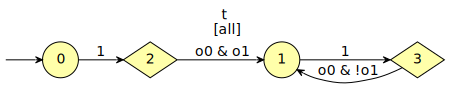

In [14]:
si = spot.synthesis_info()
si.minimize_lvl = 3
aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
print(table["n_lit"])
aut_ms

## Testing dimacs output

In [15]:
import tempfile

si = spot.synthesis_info()
si.minimize_lvl = 3

with tempfile.NamedTemporaryFile(dir='.', suffix='.dimacslog') as t:
    si.opt.set_str("satlogdimacs", t.name)
    aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
    with open(t.name, "r") as f:
        print("".join(f.readlines()))
    
    

task premin_time reorg_time partsol_time player_incomp_time  \
0      presat     25643.5  1.563e-06      5.4e-06         2.0519e-05   
1         sat         NaN        NaN          NaN                NaN   
2  refinement         NaN        NaN          NaN                NaN   
3         sat         NaN        NaN          NaN                NaN   

  incomp_time split_all_let_time split_min_let_time split_cstr_time  \
0     1.3e-07          3.968e-06          9.698e-06       7.624e-06   
1         NaN                NaN                NaN             NaN   
2         NaN                NaN                NaN             NaN   
3         NaN                NaN                NaN             NaN   

  prob_init_build_time  ... refine_time   total_time n_classes n_refinement  \
0            3.211e-05  ...         NaN          NaN       NaN          NaN   
1                  NaN  ...         NaN          NaN         1            0   
2                  NaN  ...  4.4633e-05          NaN         1            1   
3                  NaN  ...         NaN  0.000280675         2            0   

  n_lit n_clauses n_iteration n_bisim_let n_min_states done  
0   NaN       NaN         NaN           1          NaN  NaN  
1     3         6           0         NaN          NaN  NaN  
2    10        16         NaN         NaN          NaN  NaN  
3    17        29           1         NaN            4    1  

[4 rows x 22 columns]

c ### Next Instance 1 0 ###
p cnf 5 5
-1 2 -3 0
1 -3 0
1 -5 0
2 -5 0
3 -5 0
c ### Next Instance 1 1 ###
p cnf 12 15
-1 2 -3 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
c ### Next Instance 2 0 ###
p cnf 19 29
-3 -1 2 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
11 -16 -17 0
1 -15 -17 0
-1 13 -14 0
-11 13 -16 0
-11 -15 2 0
-13 -15 2 0
1 11 -19 0
13 -19 2 0
15 16 -19 0
3 14 -19 0
-2 0
-12 0
-5 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
11 -14 0

